In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [2]:
df = pd.read_excel('oasis_longitudinal_demographics.xlsx')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [3]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.121584,0.729556,1.195460
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.135956,0.037141,0.138105
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1105.652499,0.644399,0.875539
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.330000,0.700191,1.098979
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.041312,0.728789,1.193844
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1596.936793,0.755669,1.292980
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.479526,0.836842,1.587298


In [4]:
df.shape

(373, 15)

In [5]:
print(df.dtypes)

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV          float64
nWBV          float64
ASF           float64
dtype: object


In [6]:
na_counts = df.isnull().sum()
print(na_counts)

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [7]:
df.dropna(subset=['SES','MMSE'], inplace=True)
na_counts = df.isnull().sum()
print(na_counts)

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


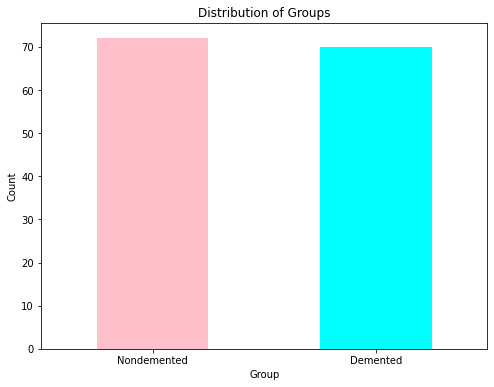

In [8]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

group_counts = df['Group'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['pink', 'cyan'])
plt.title('Distribution of Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

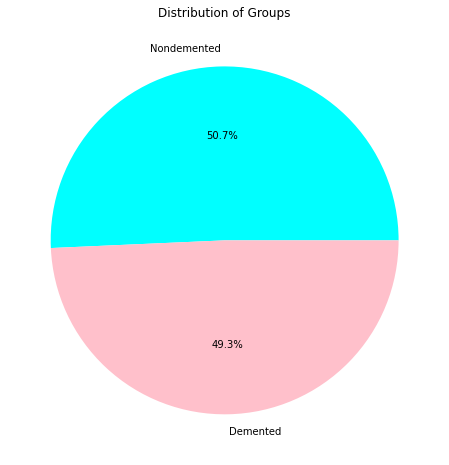

In [9]:
# Create a pie chart
plt.figure(figsize=(8, 8))
group_counts.plot(kind='pie', autopct='%1.1f%%', colors=['cyan', 'pink'])
plt.title('Distribution of Groups')
plt.ylabel('')
plt.show()

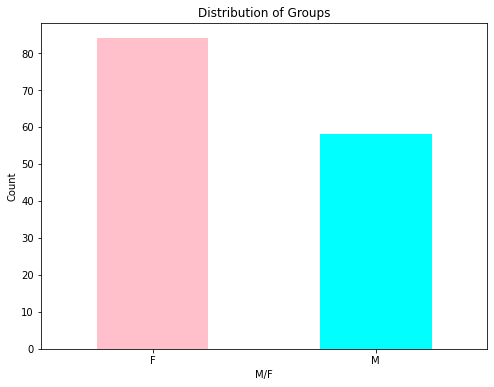

In [10]:
group_counts = df['M/F'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['pink', 'cyan'])
plt.title('Distribution of Groups')
plt.xlabel('M/F')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

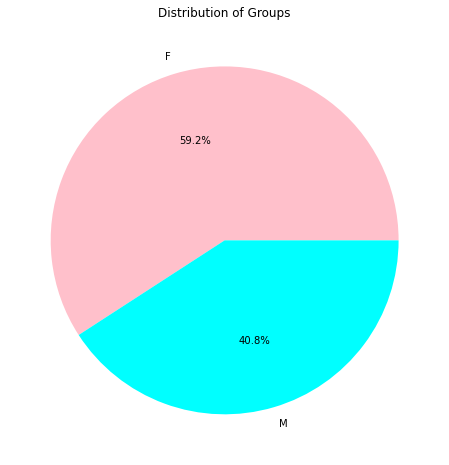

In [11]:
plt.figure(figsize=(8, 8))
group_counts.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'cyan'])
plt.title('Distribution of Groups')
plt.ylabel('')
plt.show()

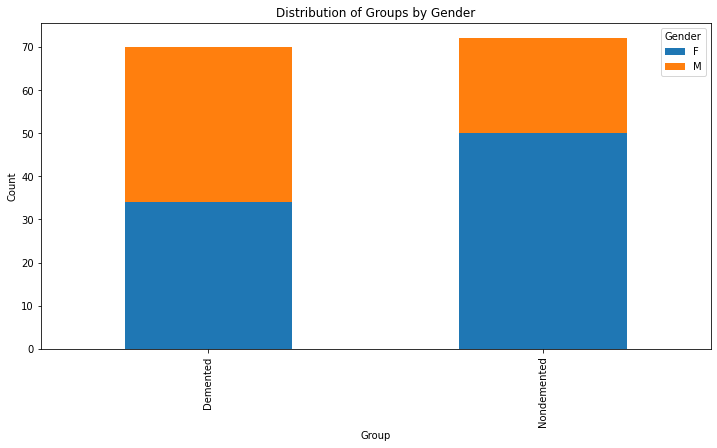

In [12]:
group_gender_counts = df.groupby(['Group', 'M/F']).size().unstack(fill_value=0)

# Create a multi-level pie chart
ax = group_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Count')
plt.title('Distribution of Groups by Gender')

# Display the legend
plt.legend(title='Gender', loc='upper right')

plt.show()

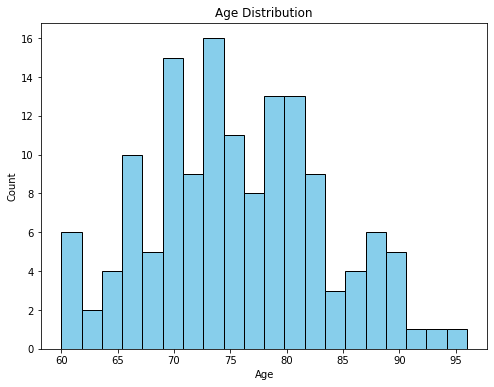

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

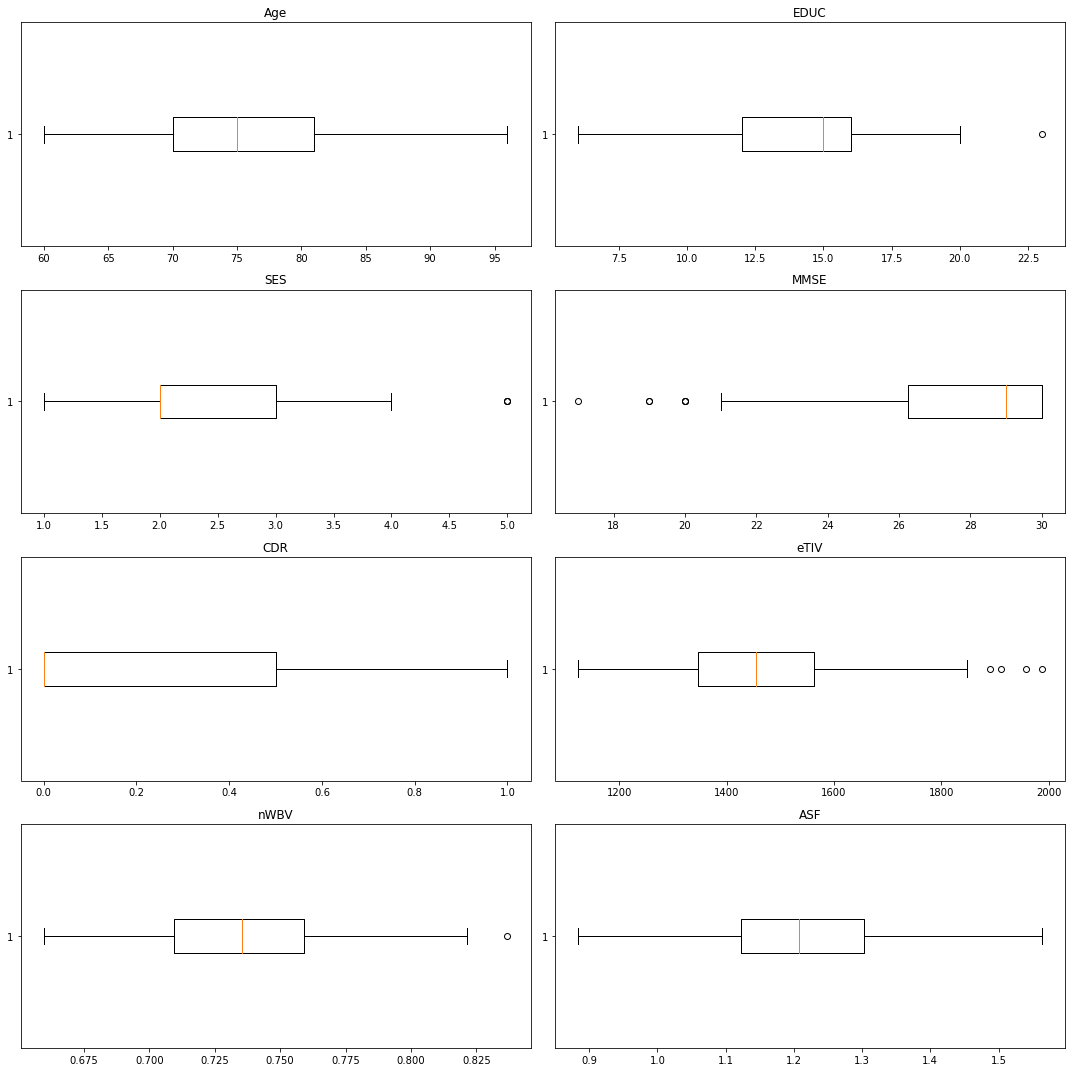

In [14]:
columns_to_boxplot = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Create subplots in a 2 by 4 grid
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.ravel()

for i, column in enumerate(columns_to_boxplot):
    # Create a boxplot for each column
    axes[i].boxplot(df[column], vert=False)
    axes[i].set_title(column)

# Remove empty subplots
for i in range(len(columns_to_boxplot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

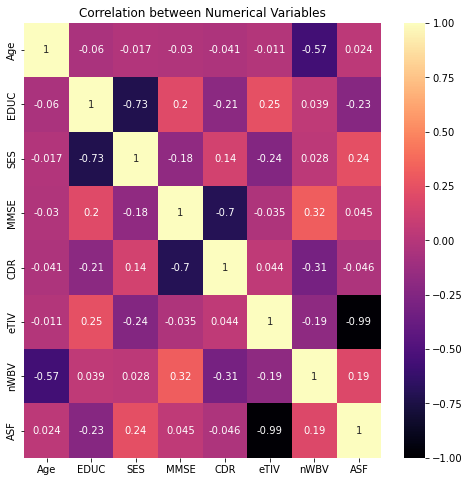

In [15]:
correlation_matrix = df[['Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF']].corr()

# display the correlation coefficients in heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True,cmap='magma')
plt.title('Correlation between Numerical Variables')
plt.show()

Text(0.5, 1.0, 'MMSE vs Dementia')

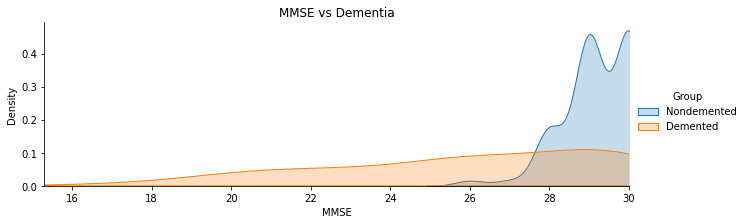

In [16]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)
plt.title('MMSE vs Dementia')

Text(0.5, 1.0, 'nWBV vs Dementia')

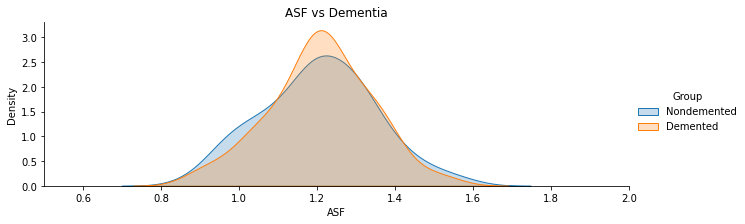

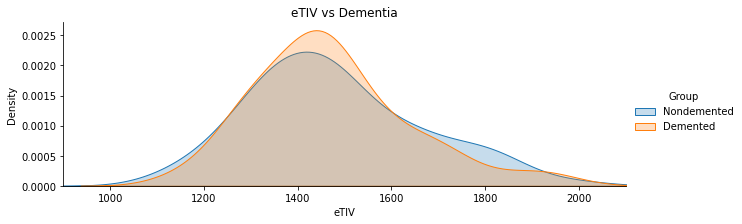

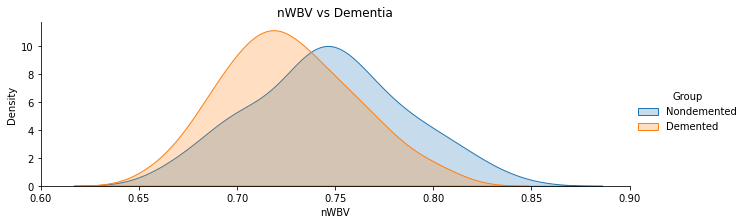

In [17]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)
plt.title('ASF vs Dementia')

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)
plt.title('eTIV vs Dementia')

#'nWBV' = Normalized Whole Brain Volume

facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)
plt.title('nWBV vs Dementia')

Text(0.5, 1.0, 'EDUC vs Dementia')

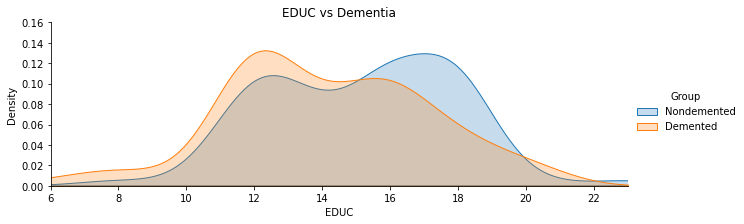

In [18]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)
plt.title('EDUC vs Dementia')

In [19]:
age_bins = [60, 65, 70, 75, 80, 85, 90, 95, 100]
age_labels = ['60-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100']

# Create a new column 'AgeGroup' based on the defined bins and labels
df_agegroup = df.copy()
df_agegroup['AgeGroup'] = pd.cut(df_agegroup['Age'], bins=age_bins, labels=age_labels, right=False)



In [20]:
#print(contingency_table)

In [21]:
print(df_agegroup)

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88   
2    OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80   
3    OAS2_0008  OAS2_0008_MR1  Nondemented      1         0   F    R   93   
4    OAS2_0009  OAS2_0009_MR1     Demented      1         0   M    R   68   
..         ...            ...          ...    ...       ...  ..  ...  ...   
137  OAS2_0179  OAS2_0179_MR1     Demented      1         0   M    R   79   
138  OAS2_0183  OAS2_0183_MR1  Nondemented      1         0   F    R   66   
139  OAS2_0184  OAS2_0184_MR1     Demented      1         0   F    R   72   
140  OAS2_0185  OAS2_0185_MR1     Demented      1         0   M    R   80   
141  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   

     EDUC  SES  MMSE  CDR     eTIV      nWBV      ASF AgeGroup  
0      14 

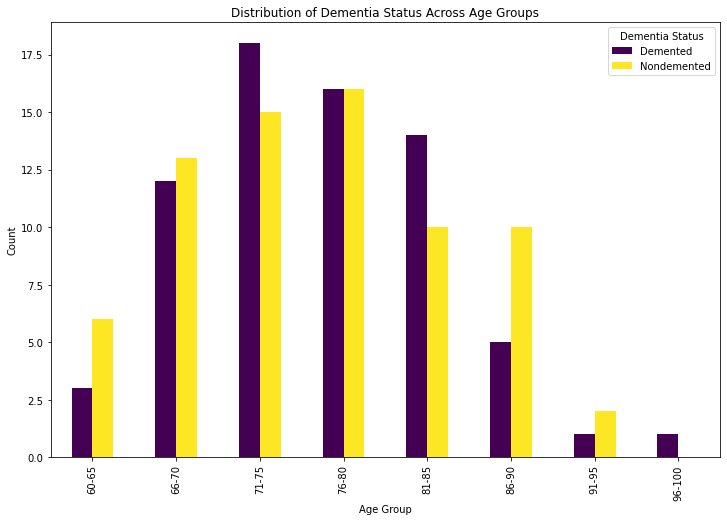

In [22]:
grouped_data = df_agegroup.groupby(['AgeGroup', 'Group']).size().unstack(fill_value=0)

# Plot the grouped bar graph
grouped_data.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='viridis')


# Set labels and title
plt.title('Distribution of Dementia Status Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Display legend
plt.legend(title='Dementia Status')

plt.show()

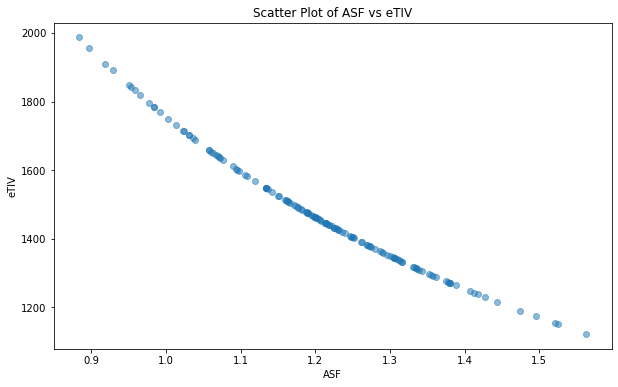

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ASF'], df['eTIV'], alpha=0.5)

# Set labels and title
plt.title(f'Scatter Plot of ASF vs eTIV')
plt.xlabel('ASF')
plt.ylabel('eTIV')

# Show the plot
plt.show()

In [24]:
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])
df['Group'] = df['Group'].replace(['Demented','Nondemented'],[1,0])

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_train)
X_trainval_scaled_dna = scaler.transform(X_train)
X_test_scaled_dna = scaler.transform(X_test)

logreg_model = LogisticRegression(C=10)

# Fit the model on the training data
logreg_model.fit(X_trainval_scaled_dna, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test_scaled_dna)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,target_names = ['Non Demented','Demented'])

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.8056

Confusion Matrix:
[[13  6]
 [ 1 16]]

Classification Report:
              precision    recall  f1-score   support

Non Demented       0.93      0.68      0.79        19
    Demented       0.73      0.94      0.82        17

    accuracy                           0.81        36
   macro avg       0.83      0.81      0.80        36
weighted avg       0.83      0.81      0.80        36



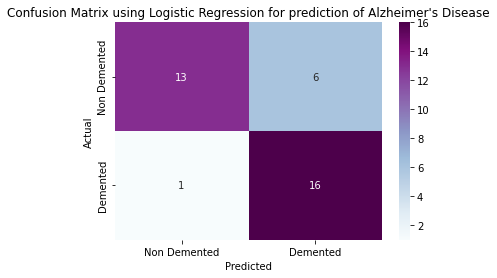

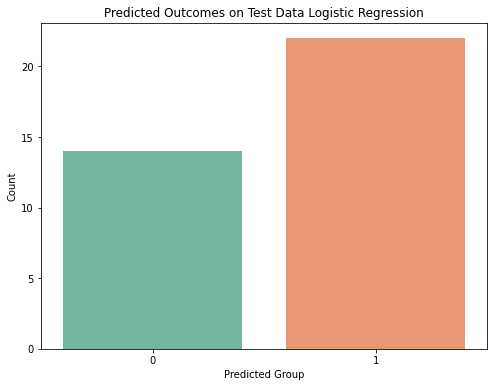

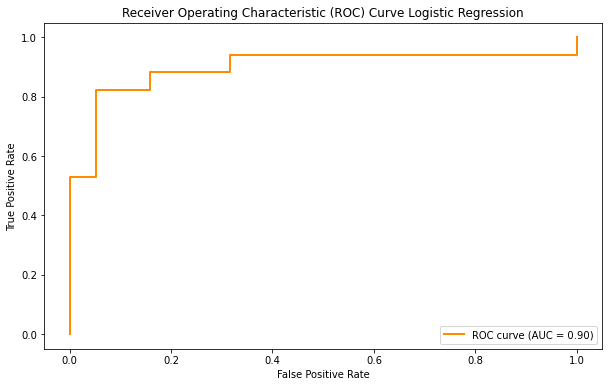

Accuracy: 0.8056

Confusion Matrix:
[[13  6]
 [ 1 16]]

Classification Report:
              precision    recall  f1-score   support

Non Demented       0.93      0.68      0.79        19
    Demented       0.73      0.94      0.82        17

    accuracy                           0.81        36
   macro avg       0.83      0.81      0.80        36
weighted avg       0.83      0.81      0.80        36



In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

Conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion Matrix Heatmap
ax = sns.heatmap(Conf_matrix, annot=True, cmap='BuPu')
ax.set_title("Confusion Matrix using Logistic Regression for prediction of Alzheimer's Disease");
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['Non Demented','Demented'])
ax.yaxis.set_ticklabels(['Non Demented','Demented'])
## Display the visualization of the Confusion Matrix.
plt.show()

# Bar Chart for Predicted Outcomes
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, palette="Set2")
plt.title('Predicted Outcomes on Test Data Logistic Regression')
plt.xlabel('Predicted Group')
plt.ylabel('Count')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test_scaled_dna)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Print Evaluation Metrics
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


In [27]:
y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE','nWBV','CDR','ASF']] # Features we use
#X = df[['M/F', 'Age','MMSE','eTIV','nWBV', 'CDR']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
scaler = MinMaxScaler().fit(X_train)
X_trainval_scaled_dna = scaler.transform(X_train)
X_test_scaled_dna = scaler.transform(X_test)

In [29]:
#Decision Tree.
SelectedDTModel = DecisionTreeClassifier(max_depth= 4).fit(X_trainval_scaled_dna, y_train)
test_score = SelectedDTModel.score(X_test_scaled_dna, y_test)
dt_PredictedOutput = SelectedDTModel.predict(X_test_scaled_dna)
test_recall = recall_score(y_test, dt_PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, dt_PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Decision Tree")
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_PredictedOutput))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt_PredictedOutput))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt_PredictedOutput)))
df4=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':dt_PredictedOutput})
df4

Decision Tree
Test accuracy with best parameter is  0.9166666666666666
Test recall with best parameters is  0.9411764705882353
Test AUC with the best parameter is  0.9179566563467493
Mean Absolute Error: 0.08333333333333333
Mean Squared Error: 0.08333333333333333
Root Mean Squared Error: 0.28867513459481287


,Actual Value,Predicted Value
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,0,0
9,0,1


In [31]:
# Assuming your decision tree model is named 'decision_tree_model'
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, auc, classification_report

decision_tree_model=SelectedDTModel
train_pred = decision_tree_model.predict(X_train)

# Evaluate training set performance
train_accuracy = accuracy_score(y_train, train_pred)
train_roc = roc_auc_score(y_train, train_pred)

# Print training set performance metrics
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training ROC: {train_roc:.4f}')


Training Accuracy: 0.8868
Training ROC: 0.8868


C:\Users\grnit\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [32]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree_model, feature_names=list(X_train.columns))
print(tree_rules)


|--- CDR <= 0.25
|   |--- SES <= 0.12
|   |   |--- ASF <= 0.56
|   |   |   |--- M/F <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- M/F >  0.50
|   |   |   |   |--- class: 0
|   |   |--- ASF >  0.56
|   |   |   |--- EDUC <= 0.65
|   |   |   |   |--- class: 1
|   |   |   |--- EDUC >  0.65
|   |   |   |   |--- class: 0
|   |--- SES >  0.12
|   |   |--- Age <= 0.62
|   |   |   |--- ASF <= 0.48
|   |   |   |   |--- class: 0
|   |   |   |--- ASF >  0.48
|   |   |   |   |--- class: 0
|   |   |--- Age >  0.62
|   |   |   |--- Age <= 0.74
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  0.74
|   |   |   |   |--- class: 0
|--- CDR >  0.25
|   |--- class: 1



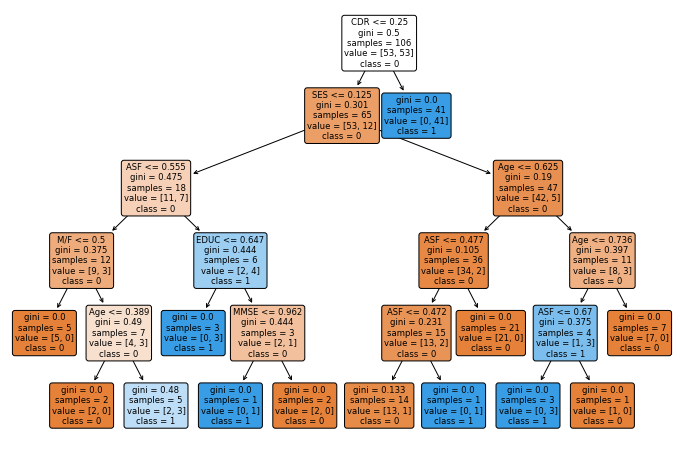

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assume X_trainval_scaled_dna, X_test_scaled_dna, y_train are defined
SelectedDTModel = DecisionTreeClassifier(max_depth=5).fit(X_trainval_scaled_dna, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(SelectedDTModel, filled=True, feature_names=list(X_train.columns), class_names=['0', '1'], rounded=True)
plt.show()


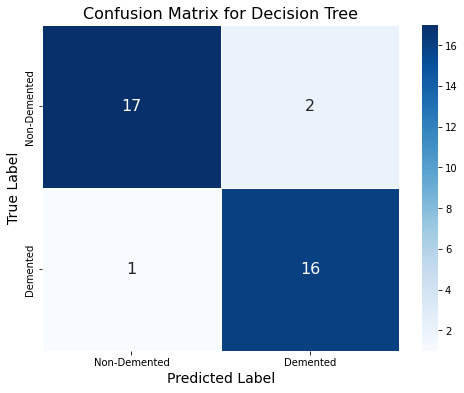

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, dt_PredictedOutput)

# Displaying Pretty Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})
plt.title("Confusion Matrix for Decision Tree", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Demented', 'Demented'])  # Adjust labels based on your class order
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Demented', 'Demented'])  # Adjust labels based on your class order
plt.show()


In [35]:
# False Positives (FP) is conf_matrix[0, 1]
# False Negatives (FN) is conf_matrix[1, 0]
# Total Observations is the sum of all elements in the confusion matrix
total_observations = np.sum(conf_matrix)

# Calculate the test error rate
test_error_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / total_observations

print(f"Test Error Rate: {test_error_rate:.2%}")

Test Error Rate: 8.33%


In [36]:
class_report = classification_report(y_test, dt_PredictedOutput)
print("\nClassification Report for Decision Tree:")
print(class_report)


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.89      0.94      0.91        17

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



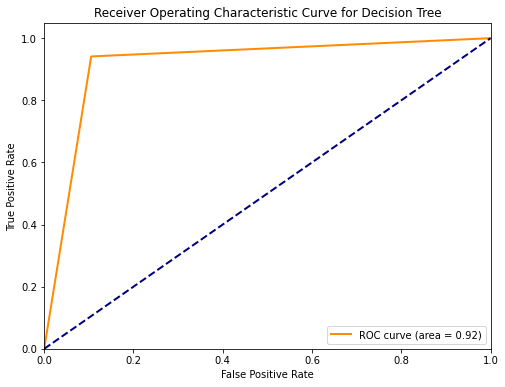

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(test_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [38]:
y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
scaler = MinMaxScaler().fit(X_train)
X_trainval_scaled_dna = scaler.transform(X_train)
X_test_scaled_dna = scaler.transform(X_test)

In [40]:
#SVM               
SelectedSVMmodel = SVC(C=100, gamma=0.25, kernel="linear").fit(X_trainval_scaled_dna, y_train)
test_score = SelectedSVMmodel.score(X_test_scaled_dna, y_test)
svm_PredictedOutput = SelectedSVMmodel.predict(X_test_scaled_dna)
test_recall = recall_score(y_test, svm_PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, svm_PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("SVM")
print("Test accuracy: ", test_score)
print("Test recall: ", test_recall)
print("Test Area Under Curve(AUC):", test_auc)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svm_PredictedOutput))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svm_PredictedOutput))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svm_PredictedOutput)))
df5=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':svm_PredictedOutput})
df5

SVM
Test accuracy:  0.8275862068965517
Test recall:  0.9333333333333333
Test Area Under Curve(AUC): 0.8238095238095238
Mean Absolute Error: 0.1724137931034483
Mean Squared Error: 0.1724137931034483
Root Mean Squared Error: 0.41522739926869984


,Actual Value,Predicted Value
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,0,1
9,0,1


[[10  4]
 [ 1 14]]


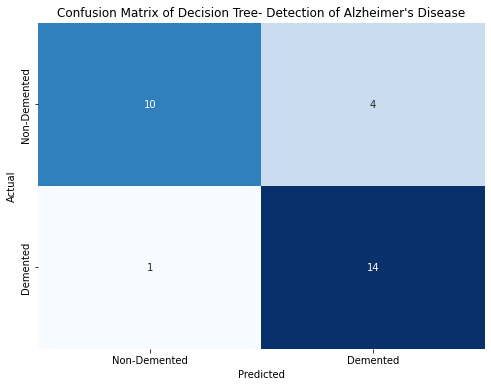

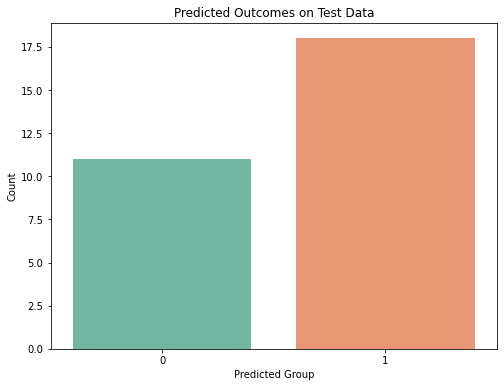

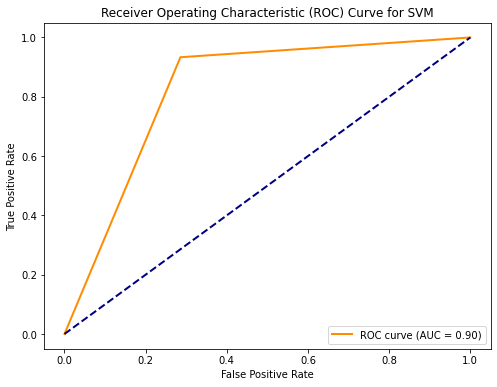

In [41]:
#Confusion Matrix heatmap
conf_matrix = confusion_matrix(y_test, svm_PredictedOutput)
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix of Decision Tree- Detection of Alzheimer\'s Disease')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Demented', 'Demented'])  # Adjust labels based on your class order
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Demented', 'Demented'])  # Adjust labels based on your class order
plt.show()

# Bar Chart for Predicted Outcomes
plt.figure(figsize=(8, 6))
sns.countplot(x=svm_PredictedOutput, palette="Set2")
plt.title('Predicted Outcomes on Test Data')
plt.xlabel('Predicted Group')
plt.ylabel('Count')
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()

In [42]:
model = GaussianNB()
model.fit(X_trainval_scaled_dna, y_train)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test_scaled_dna)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
test_error_rate = 1 - accuray

classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", accuray)
print("F1 Score:", f1)
print("Test Error Rate:", test_error_rate)
print('Classification Report:\n', classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.9310344827586207
F1 Score: 0.9310344827586207
Test Error Rate: 0.06896551724137934
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      0.93      0.93        15

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



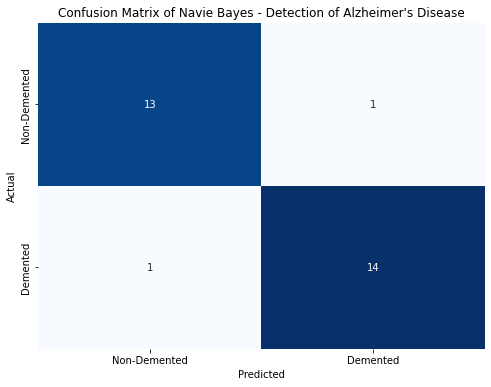

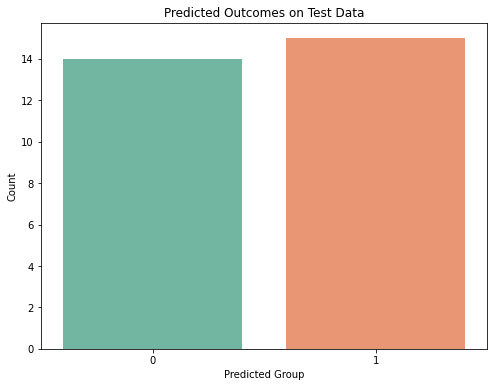

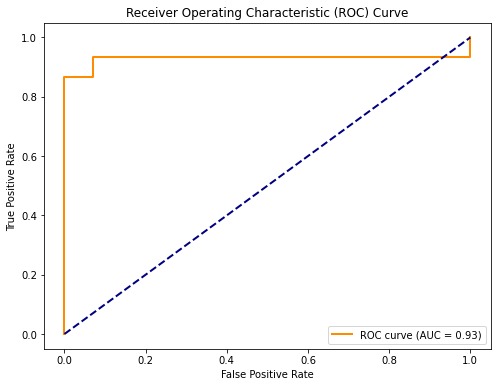

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix of Navie Bayes - Detection of Alzheimer\'s Disease')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Demented', 'Demented'])  # Adjust labels based on your class order
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Demented', 'Demented'])  # Adjust labels based on your class order
plt.show()

# Bar Chart for Predicted Outcomes
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, palette="Set2")
plt.title('Predicted Outcomes on Test Data')
plt.xlabel('Predicted Group')
plt.ylabel('Count')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled_dna)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print Evaluation Metrics





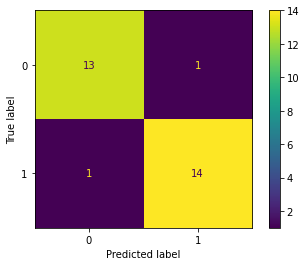

In [44]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [45]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score


xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=0)

# Train the model on the training data
xgb_model.fit(X_trainval_scaled_dna, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test_scaled_dna)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled_dna)[:, 1])
classification_rep = classification_report(y_test, y_pred)
test_error_rate = 1 - accuracy
y_probs = xgb_model.predict_proba(X_test_scaled_dna)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print("XGBoost Classifier")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

print("Test Error Rate:", test_error_rate)
print("\nClassfication Report")
print(classification_rep)

XGBoost Classifier
Accuracy: 0.8620689655172413
Recall: 0.9333333333333333
ROC AUC: 0.9285714285714286
Test Error Rate: 0.13793103448275867

Classfication Report
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.82      0.93      0.87        15

    accuracy                           0.86        29
   macro avg       0.87      0.86      0.86        29
weighted avg       0.87      0.86      0.86        29



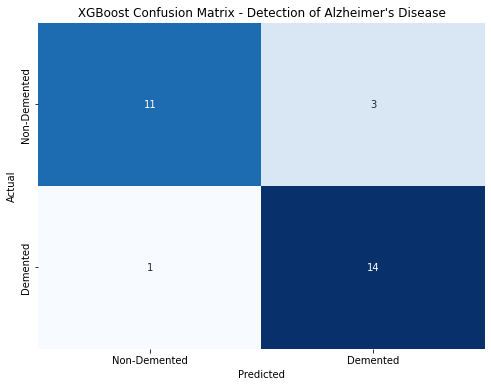

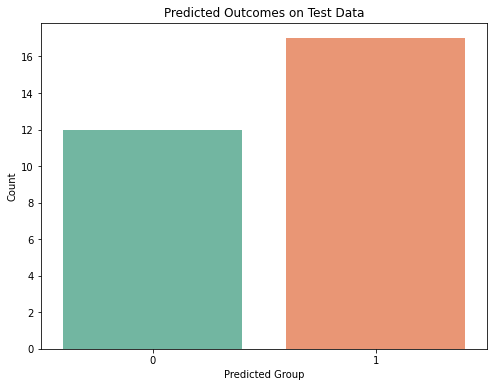

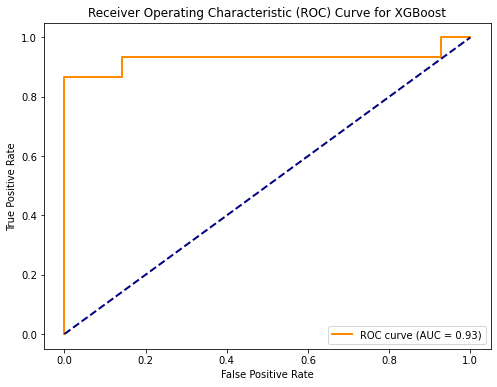

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(' XGBoost Confusion Matrix - Detection of Alzheimer\'s Disease ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Demented', 'Demented'])  # Adjust labels based on your class order
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Demented', 'Demented'])  # Adjust labels based on your class order
plt.show()

# Bar Chart for Predicted Outcomes
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, palette="Set2")
plt.title('Predicted Outcomes on Test Data')
plt.xlabel('Predicted Group')
plt.ylabel('Count')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled_dna)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()